In [5]:
import sklearn

ModuleNotFoundError: No module named 'sklearn'

In [1]:
import pandas as pd
df=pd.read_csv("Doceree-HCP_Train.csv",encoding='latin-1')
df.head(5)

,ID,DEVICETYPE,PLATFORM_ID,BIDREQUESTIP,USERPLATFORMUID,USERCITY,USERZIPCODE,USERAGENT,PLATFORMTYPE,CHANNELTYPE,URL,KEYWORDS,TAXONOMY,IS_HCP
0,1001,Desktop,2,170.173.0.22,6974dcaa-f932-480e-9fb5-c52e20e1393a,Portland,97206.0,Mozilla/5.0 (Windows NT 10.0; Win64; x64) Appl...,Online Medical Journal,Website,https://www.cancertherapyadvisor.com/home/canc...,General|Endocrine|False|Medicine|Surgery|Urolo...,NaN,0.0
1,1002,Desktop,2,65.216.253.25,c12f3f8f-8fcf-484a-90e1-1ac04db8cdcf,Arlington,22202.0,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7...,Online Medical Journal,Website,https://www.cancertherapyadvisor.com/home/deci...,Bone Marrow|Radiography|Chronic|Oncology|Psych...,NaN,0.0
2,1003,Desktop,2,66.232.79.22,a698de4b-e200-46dd-b5fb-40402175ae18,New Meadows,83654.0,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7...,Online Medical Journal,Website,https://www.cancertherapyadvisor.com/home/canc...,General|Endocrine|False|Medicine|Surgery|Urolo...,NaN,0.0
3,1004,Desktop,3,137.54.125.246,45967533-75c8-4fbd-a00c-e6ff20447aaa,NaN,229114624.0,Mozilla/5.0 (Windows NT 10.0; Win64; x64) Appl...,Online Medical Journal,Website,https://globalrph.com/medcalcs/warfarin-mainte...,Dental|Total|Clinical|Pharmacology|Physicians|...,2084P0800X,1.0
4,1005,Mobile,7,174.202.231.99,a17e25be-532d-4cf5-b916-9308c8c3961f,Houston,77008.0,Mozilla/5.0 (iPhone; CPU iPhone OS 16_1_1 like...,Online Medical Journal,Website,https://www.cureus.com/articles/58184-a-review...,Critical Care|Emergency Medicine|General Pract...,NaN,0.0


In [24]:
df=df.reset_index()

In [13]:
df['TAXONOMY'][32202]

nan

In [14]:
len(df)

113937

In [15]:
df3=df['USERZIPCODE'].fillna(0)

In [16]:
df3.head()

0        97206.0
1        22202.0
2        83654.0
3    229114624.0
4        77008.0
Name: USERZIPCODE, dtype: float64

In [17]:
df['USERZIPCODE']=df3

In [18]:
df.isna().sum()

ID                     0
DEVICETYPE             0
PLATFORM_ID            0
BIDREQUESTIP           0
USERPLATFORMUID        4
USERCITY            6359
USERZIPCODE            0
USERAGENT              2
PLATFORMTYPE           0
CHANNELTYPE            0
URL                    0
KEYWORDS               0
TAXONOMY           81624
IS_HCP                 1
dtype: int64

In [19]:
df2=df['TAXONOMY'].fillna('None')

In [20]:
df['TAXONOMY']=df2

In [21]:
df1=df['USERCITY'].fillna('Neutral')

In [22]:
df['USERCITY']=df1

In [23]:
df=df.dropna(axis=0)

In [25]:
df.shape

(113930, 15)

In [26]:
countTYHY=0
countTNHY=0
countTYHN=0
count=0
for i in range(len(df)):
    # print(i)
    if df['TAXONOMY'][i]!='None' and df['IS_HCP'][0]!=0.0:
        countTYHY+=1
    elif df['TAXONOMY'][i]=='None' and df['IS_HCP'][0]!=0.0:
        countTNHY+=1
    elif df['TAXONOMY'][i]!='None' and df['IS_HCP'][0]==0.0:
        countTYHN+=1
    else:
        count+=1

In [27]:
print(countTYHN,countTNHY,countTYHY,count)

32309 0 0 81621


<Axes: xlabel='count', ylabel='TAXONOMY'>

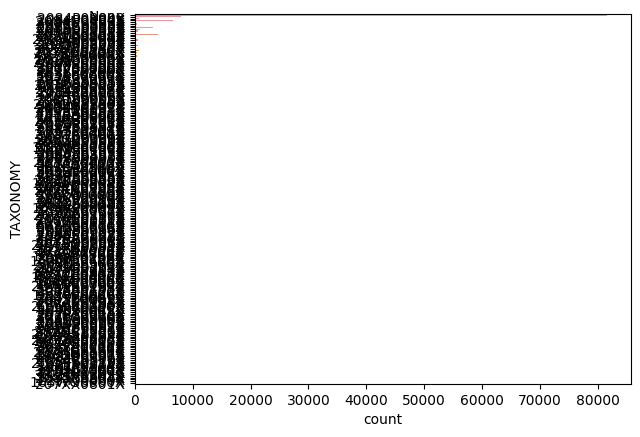

In [28]:
import seaborn as sb
sb.countplot(y=df.TAXONOMY)

In [29]:
pip install ray

In [30]:
import ray

In [127]:
ray.shutdown()

In [31]:
ray.init(num_gpus=2)

2023-06-27 18:27:47,009	INFO worker.py:1636 -- Started a local Ray instance.


Python version:,3.10.12
Ray version:,2.5.1


<Axes: xlabel='count', ylabel='CHANNELTYPE'>

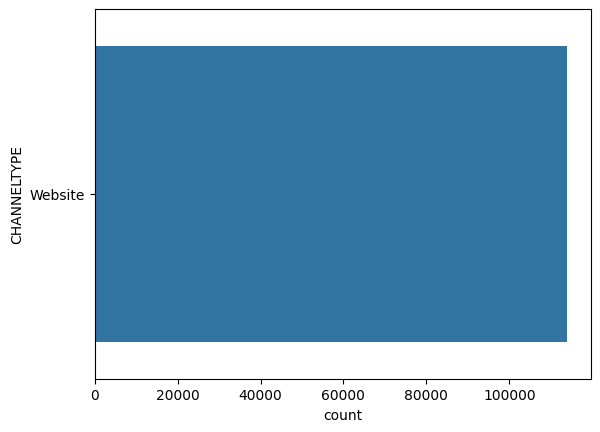

In [32]:
sb.countplot(y=df.CHANNELTYPE)

<Axes: xlabel='count', ylabel='DEVICETYPE'>

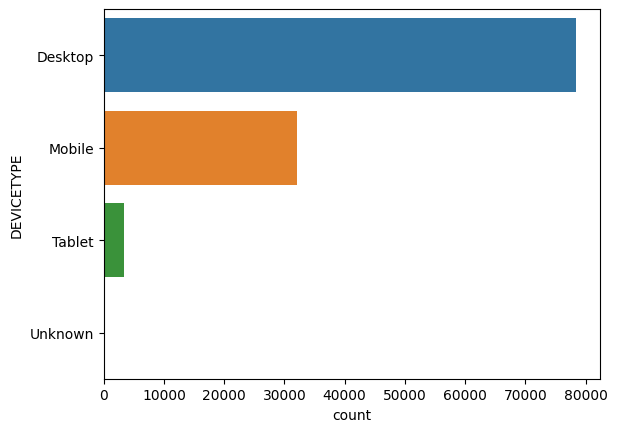

In [33]:
sb.countplot(y=df.DEVICETYPE)

<Axes: xlabel='count', ylabel='USERCITY'>

/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 24 () missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 24 () missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


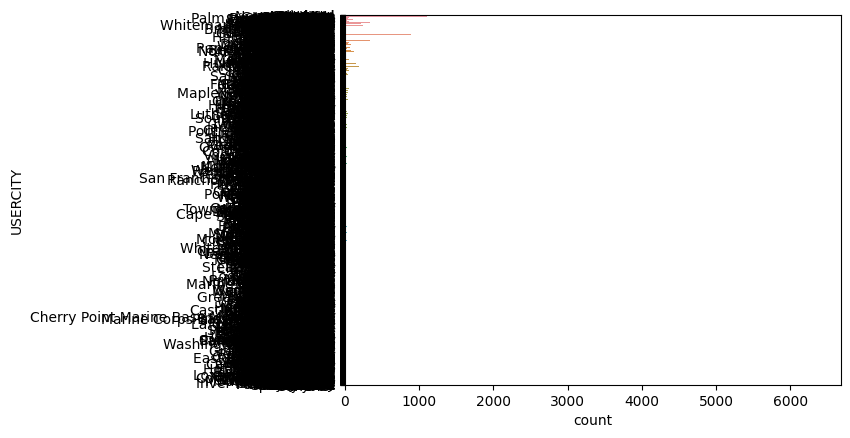

In [34]:
sb.countplot(y=df.USERCITY)

In [35]:
len(df['TAXONOMY'].unique())

208

In [36]:
for i in range(len(df)):
    df['KEYWORDS'][i]=df['KEYWORDS'][i].split('|')

<ipython-input-36-f3a50766caba>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['KEYWORDS'][i]=df['KEYWORDS'][i].split('|')


In [37]:
type(df['KEYWORDS'][0][0])

str

In [38]:
df.shape

(113930, 15)

In [39]:
dict_len={}
for i in range(len(df)):
    j=len(df['KEYWORDS'][i])
    if j not in dict_len.keys():
        dict_len[j]=1
    else:
        dict_len[j]+=1

In [40]:
df.isna().sum()

index              0
ID                 0
DEVICETYPE         0
PLATFORM_ID        0
BIDREQUESTIP       0
USERPLATFORMUID    0
USERCITY           0
USERZIPCODE        0
USERAGENT          0
PLATFORMTYPE       0
CHANNELTYPE        0
URL                0
KEYWORDS           0
TAXONOMY           0
IS_HCP             0
dtype: int64

In [41]:
len(df['BIDREQUESTIP'].unique())

33660

In [42]:
print(dict_len)

{20: 2579, 40: 4299, 9: 239, 56: 530, 38: 1136, 66: 4572, 29: 8336, 58: 394, 43: 422, 57: 1096, 52: 3311, 28: 3020, 59: 1516, 42: 1880, 24: 6814, 4: 278, 35: 3882, 17: 3124, 32: 1072, 18: 2494, 47: 1778, 45: 1212, 82: 1465, 10: 904, 33: 2737, 19: 3320, 13: 1155, 65: 936, 26: 4629, 21: 2338, 23: 3719, 16: 2920, 22: 3400, 25: 2754, 36: 3580, 30: 2307, 5: 44, 41: 666, 51: 488, 63: 738, 64: 861, 74: 12, 15: 993, 44: 2203, 31: 869, 34: 1838, 27: 3536, 62: 395, 14: 801, 67: 135, 61: 525, 60: 931, 78: 794, 12: 1415, 54: 1725, 109: 6, 11: 154, 49: 710, 37: 379, 50: 454, 55: 730, 39: 534, 70: 19, 83: 46, 8: 61, 71: 439, 69: 125, 92: 27, 68: 214, 48: 322, 53: 178, 73: 10, 94: 13, 7: 65, 81: 57, 144: 29, 111: 7, 98: 4, 87: 5, 100: 8, 80: 15, 6: 108, 76: 5, 126: 5, 72: 7, 46: 27, 75: 6, 123: 6, 138: 7, 77: 8, 86: 7, 89: 1, 84: 3, 106: 5, 93: 1, 91: 2, 102: 1, 85: 2, 143: 1}


In [43]:
import matplotlib.pyplot as plt

In [44]:
myKeys = list(dict_len.keys())
myKeys.sort()
sorted_dict = {i: dict_len[i] for i in myKeys}

In [45]:
# sorted_dict

In [46]:
sd={'name':sorted_dict.keys(),'value':sorted_dict.values()}
# len(sd['name'])

In [47]:
df_plt=pd.DataFrame.from_dict(sd)
df_plt.head()

,name,value
0,4,278
1,5,44
2,6,108
3,7,65
4,8,61


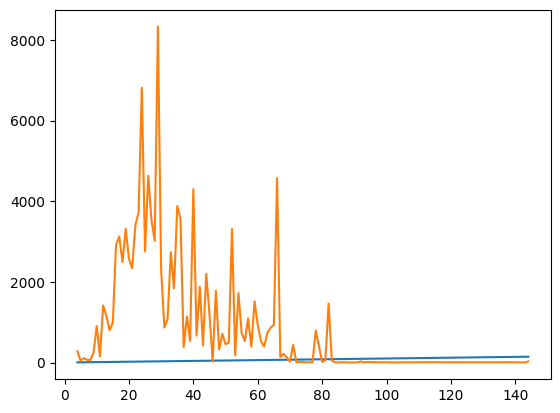

In [48]:
plt.plot(df_plt.name,df_plt.values)

(array([[99.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
        [59., 14.,  8.,  8.,  5.,  3.,  0.,  0.,  1.,  1.]]),
 array([1.0000e+00, 8.3450e+02, 1.6680e+03, 2.5015e+03, 3.3350e+03,
        4.1685e+03, 5.0020e+03, 5.8355e+03, 6.6690e+03, 7.5025e+03,
        8.3360e+03]),
 <a list of 2 BarContainer objects>)

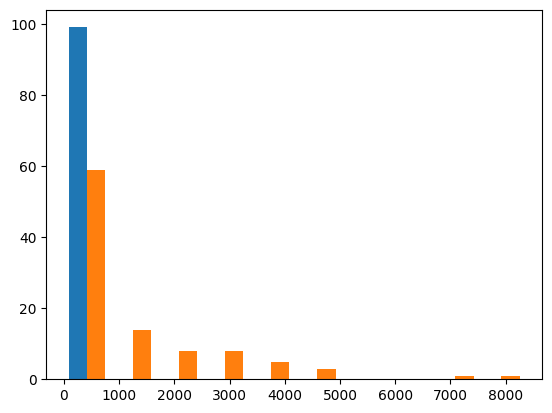

In [49]:
plt.hist(df_plt.values)

In [50]:
new_places=[]
for i in range(len(df)):
  if df['USERCITY'][i] not in new_places:
    new_places.append(df['USERCITY'][i])
print(len(new_places))

4421


In [51]:
place_dict={}
for i in range(len(new_places)):
    place_dict[new_places[i]]=0

In [52]:
for i in range(len(df)):
    place_dict[df['USERCITY'][i]]+=1

In [53]:
# place_dict

In [54]:
myKeys1 = list(place_dict.keys())
myKeys1.sort()
sorted_place = {i: place_dict[i] for i in myKeys1}

In [55]:
len(myKeys1)

4421

In [56]:
new_words=[]
for i in range(len(df)):
  for j in range(len(df['KEYWORDS'][i])):
    if df['KEYWORDS'][i][j] not in new_words:
      new_words.append(df['KEYWORDS'][i][j])
print(len(new_words))

1614


In [57]:
def low_case(string1):
  return string1.lower()

In [58]:
for i in range(len(df)):
  for j in range(len(df['KEYWORDS'][i])):
    df['KEYWORDS'][i][j]=df['KEYWORDS'][i][j].lower()
df.head()

,index,ID,DEVICETYPE,PLATFORM_ID,BIDREQUESTIP,USERPLATFORMUID,USERCITY,USERZIPCODE,USERAGENT,PLATFORMTYPE,CHANNELTYPE,URL,KEYWORDS,TAXONOMY,IS_HCP
0,0,1001,Desktop,2,170.173.0.22,6974dcaa-f932-480e-9fb5-c52e20e1393a,Portland,97206.0,Mozilla/5.0 (Windows NT 10.0; Win64; x64) Appl...,Online Medical Journal,Website,https://www.cancertherapyadvisor.com/home/canc...,"[general, endocrine, false, medicine, surgery,...",None,0.0
1,1,1002,Desktop,2,65.216.253.25,c12f3f8f-8fcf-484a-90e1-1ac04db8cdcf,Arlington,22202.0,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7...,Online Medical Journal,Website,https://www.cancertherapyadvisor.com/home/deci...,"[bone marrow, radiography, chronic, oncology, ...",None,0.0
2,2,1003,Desktop,2,66.232.79.22,a698de4b-e200-46dd-b5fb-40402175ae18,New Meadows,83654.0,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7...,Online Medical Journal,Website,https://www.cancertherapyadvisor.com/home/canc...,"[general, endocrine, false, medicine, surgery,...",None,0.0
3,3,1004,Desktop,3,137.54.125.246,45967533-75c8-4fbd-a00c-e6ff20447aaa,Neutral,229114624.0,Mozilla/5.0 (Windows NT 10.0; Win64; x64) Appl...,Online Medical Journal,Website,https://globalrph.com/medcalcs/warfarin-mainte...,"[dental, total, clinical, pharmacology, physic...",2084P0800X,1.0
4,4,1005,Mobile,7,174.202.231.99,a17e25be-532d-4cf5-b916-9308c8c3961f,Houston,77008.0,Mozilla/5.0 (iPhone; CPU iPhone OS 16_1_1 like...,Online Medical Journal,Website,https://www.cureus.com/articles/58184-a-review...,"[critical care, emergency medicine, general pr...",None,0.0


In [156]:
type(df['KEYWORDS'][i][j])

str

In [59]:
df.describe()

,index,ID,PLATFORM_ID,USERZIPCODE,IS_HCP
count,113930.000000,113930.000000,113930.000000,1.139300e+05,113930.000000
mean,56966.886114,57967.886114,3.574941,1.756583e+07,0.299974
std,32891.162311,32891.162311,2.568991,1.045838e+08,0.458248
min,0.000000,1001.000000,1.000000,0.000000e+00,0.000000
25%,28482.250000,29483.250000,2.000000,1.523700e+04,0.000000
50%,56965.500000,57966.500000,2.000000,3.813300e+04,0.000000
75%,85451.750000,86452.750000,6.000000,7.700700e+04,1.000000
max,113936.000000,114937.000000,16.000000,9.970149e+08,1.000000


In [60]:
df.info

<bound method DataFrame.info of          index      ID DEVICETYPE  PLATFORM_ID    BIDREQUESTIP  \
0            0    1001    Desktop            2    170.173.0.22   
1            1    1002    Desktop            2   65.216.253.25   
2            2    1003    Desktop            2    66.232.79.22   
3            3    1004    Desktop            3  137.54.125.246   
4            4    1005     Mobile            7  174.202.231.99   
...        ...     ...        ...          ...             ...   
113925  113932  114933    Desktop            2    68.82.97.126   
113926  113933  114934    Desktop            2  104.172.11.109   
113927  113934  114935    Desktop            7   174.21.94.113   
113928  113935  114936     Mobile            2  69.253.129.131   
113929  113936  114937     Mobile            2  108.41.233.175   

                             USERPLATFORMUID      USERCITY  USERZIPCODE  \
0       6974dcaa-f932-480e-9fb5-c52e20e1393a      Portland      97206.0   
1       c12f3f8f-8fcf-484

In [61]:
df.head()

,index,ID,DEVICETYPE,PLATFORM_ID,BIDREQUESTIP,USERPLATFORMUID,USERCITY,USERZIPCODE,USERAGENT,PLATFORMTYPE,CHANNELTYPE,URL,KEYWORDS,TAXONOMY,IS_HCP
0,0,1001,Desktop,2,170.173.0.22,6974dcaa-f932-480e-9fb5-c52e20e1393a,Portland,97206.0,Mozilla/5.0 (Windows NT 10.0; Win64; x64) Appl...,Online Medical Journal,Website,https://www.cancertherapyadvisor.com/home/canc...,"[general, endocrine, false, medicine, surgery,...",None,0.0
1,1,1002,Desktop,2,65.216.253.25,c12f3f8f-8fcf-484a-90e1-1ac04db8cdcf,Arlington,22202.0,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7...,Online Medical Journal,Website,https://www.cancertherapyadvisor.com/home/deci...,"[bone marrow, radiography, chronic, oncology, ...",None,0.0
2,2,1003,Desktop,2,66.232.79.22,a698de4b-e200-46dd-b5fb-40402175ae18,New Meadows,83654.0,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7...,Online Medical Journal,Website,https://www.cancertherapyadvisor.com/home/canc...,"[general, endocrine, false, medicine, surgery,...",None,0.0
3,3,1004,Desktop,3,137.54.125.246,45967533-75c8-4fbd-a00c-e6ff20447aaa,Neutral,229114624.0,Mozilla/5.0 (Windows NT 10.0; Win64; x64) Appl...,Online Medical Journal,Website,https://globalrph.com/medcalcs/warfarin-mainte...,"[dental, total, clinical, pharmacology, physic...",2084P0800X,1.0
4,4,1005,Mobile,7,174.202.231.99,a17e25be-532d-4cf5-b916-9308c8c3961f,Houston,77008.0,Mozilla/5.0 (iPhone; CPU iPhone OS 16_1_1 like...,Online Medical Journal,Website,https://www.cureus.com/articles/58184-a-review...,"[critical care, emergency medicine, general pr...",None,0.0


In [62]:
df[['KEYWORDS','IS_HCP']]

,KEYWORDS,IS_HCP
0,"[general, endocrine, false, medicine, surgery,...",0.0
1,"[bone marrow, radiography, chronic, oncology, ...",0.0
2,"[general, endocrine, false, medicine, surgery,...",0.0
3,"[dental, total, clinical, pharmacology, physic...",1.0
4,"[critical care, emergency medicine, general pr...",0.0
...,...,...
113925,"[cardiovascular, clinical, false, male, oncolo...",1.0
113926,"[asthma, arthritis, general, clinical, diagnos...",1.0
113927,"[rehabilitation, transplantation, clinical, pr...",1.0
113928,"[pain, disease, autoimmune, multiple sclerosis...",1.0


In [161]:
snow_stem = df[['KEYWORDS','IS_HCP']].copy()
port_stem = df[['KEYWORDS','IS_HCP']].copy()
lanc_stem = df[['KEYWORDS','IS_HCP']].copy()

In [9]:
ss=df['KEYWORDS'].copy()

In [11]:
ss

0         General|Endocrine|False|Medicine|Surgery|Urolo...
1         Bone Marrow|Radiography|Chronic|Oncology|Psych...
2         General|Endocrine|False|Medicine|Surgery|Urolo...
3         Dental|Total|Clinical|Pharmacology|Physicians|...
4         Critical Care|Emergency Medicine|General Pract...
                                ...                        
113932    Cardiovascular|Clinical|False|Male|Oncology|Ps...
113933    Asthma|Arthritis|General|Clinical|Diagnosis|Rh...
113934    Rehabilitation|Transplantation|Clinical|Preven...
113935    pain|disease|autoimmune|multiple sclerosis|gra...
113936    Genetic|Large|Autoimmune|Health|False|Abortion...
Name: KEYWORDS, Length: 113937, dtype: object

In [68]:
snow_stem = X_train.copy()
port_stem = X_train.copy()
lanc_stem = X_train.copy()

In [80]:
snow_stem

,level_0,index,KEYWORDS
0,0,17088,"[asthma, psychiatry, medicine, clinical, pedia..."
1,1,29389,"[catheterization, atherectomy, transplantation..."
2,2,30708,"[jejunum, skeleton, angiotensin, intravenous, ..."
3,3,26493,"[asthma, female, rheumatoid, pathology, neurol..."
4,4,105852,"[pharmacology, liver dysfunction, elderly, liv..."
...,...,...,...
91139,91139,76820,"[macrophages, large, respiratory tract, psychi..."
91140,91140,110268,"[erythema, hypersensitivity, arthritis, clinic..."
91141,91141,103694,"[headache, multiple sclerosis, rheumatology, p..."
91142,91142,860,"[cardiovascular, clinical, rheumatology, trans..."


In [79]:
snow_stem=snow_stem.reset_index()

In [83]:
snow_stemt = X_test.copy()
port_stemt = X_test.copy()
lanc_stemt = X_test.copy()
snow_stemt=snow_stemt.reset_index()

In [84]:
snow_stemt

,index,KEYWORDS
0,8682,"[urology, cardiology, epidural, chronic, deliv..."
1,70611,"[asthma, female, rheumatoid, pathology, neurol..."
2,2662,"[transplantation, technology, chronic, neoplas..."
3,39134,"[rheumatology, psychiatry, lupus, rheumatoid, ..."
4,70595,"[atrial fibrillation, health, rehabilitation, ..."
...,...,...
22781,112649,"[medicine, tuberculosis, false, oncology, psyc..."
22782,52918,"[myopathies, small, rheumatoid, psychiatry, ur..."
22783,12339,"[small, hospitals, emergency medicine, advance..."
22784,85557,"[transplantation, technology, chronic, neoplas..."


In [85]:
from nltk.stem import SnowballStemmer
s_stem=SnowballStemmer(language='english')
for i in range(len(snow_stemt)):
    for j in range(len(snow_stemt['KEYWORDS'][i])):
        snow_stemt['KEYWORDS'][i][j]=s_stem.stem(snow_stemt['KEYWORDS'][i][j])
snow_stemt.head()

,index,KEYWORDS
0,8682,"[urolog, cardiolog, epidur, chronic, deliveri,..."
1,70611,"[asthma, femal, rheumatoid, patholog, neurolog..."
2,2662,"[transplant, technolog, chronic, neoplasm, uro..."
3,39134,"[rheumatolog, psychiatri, lupus, rheumatoid, o..."
4,70595,"[atrial fibril, health, rehabilit, clinic, tra..."


In [81]:
from nltk.stem import SnowballStemmer
s_stem=SnowballStemmer(language='english')
for i in range(len(snow_stem)):
    for j in range(len(snow_stem['KEYWORDS'][i])):
        snow_stem['KEYWORDS'][i][j]=s_stem.stem(snow_stem['KEYWORDS'][i][j])
snow_stem.head()

,level_0,index,KEYWORDS
0,0,17088,"[asthma, psychiatri, medicin, clinic, pediatr,..."
1,1,29389,"[catheter, atherectomi, transplant, cardiac, p..."
2,2,30708,"[jejunum, skeleton, angiotensin, intraven, gen..."
3,3,26493,"[asthma, femal, rheumatoid, patholog, neurolog..."
4,4,105852,"[pharmacolog, liver dysfunct, elder, liver, cl..."


In [55]:
from nltk.stem import LancasterStemmer
L_stem=LancasterStemmer()
for i in range(len(lanc_stem)):
    for j in range(len(lanc_stem['KEYWORDS'][i])):
        lanc_stem['KEYWORDS'][i][j]=L_stem.stem(lanc_stem['KEYWORDS'][i][j])
lanc_stem.head()

,KEYWORDS,IS_HCP
0,"[gen, endocrin, fal, medicin, surger, urolog, ...",0.0
1,"[bone marrow, radiograph, chronic, oncolog, ps...",0.0
2,"[gen, endocrin, fal, medicin, surger, urolog, ...",0.0
3,"[dent, tot, clin, pharmacolog, phys, heal, dru...",1.0
4,"[critical car, emergency medicin, general prac...",0.0


In [56]:
from nltk.stem import PorterStemmer
p_stem=PorterStemmer()
for i in range(len(port_stem)):
    for j in range(len(port_stem['KEYWORDS'][i])):
        port_stem['KEYWORDS'][i][j]=p_stem.stem(port_stem['KEYWORDS'][i][j])
port_stem.head()

,KEYWORDS,IS_HCP
0,"[gen, endocrin, fal, medicin, surger, urolog, ...",0.0
1,"[bone marrow, radiograph, chronic, oncolog, ps...",0.0
2,"[gen, endocrin, fal, medicin, surger, urolog, ...",0.0
3,"[dent, tot, clin, pharmacolog, phi, heal, drug...",1.0
4,"[critical car, emergency medicin, general prac...",0.0


In [98]:
df.shape

(28492, 13)

In [93]:
import sklearn

In [94]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

In [1]:
from sklearn.model_selection import train_test_split

In [67]:
X_train

17088     [asthma, psychiatry, medicine, clinical, pedia...
29389     [catheterization, atherectomy, transplantation...
30708     [jejunum, skeleton, angiotensin, intravenous, ...
26493     [asthma, female, rheumatoid, pathology, neurol...
105852    [pharmacology, liver dysfunction, elderly, liv...
                                ...                        
76820     [macrophages, large, respiratory tract, psychi...
110268    [erythema, hypersensitivity, arthritis, clinic...
103694    [headache, multiple sclerosis, rheumatology, p...
860       [cardiovascular, clinical, rheumatology, trans...
15795     [health, medicine, chronic, total, cardiology,...
Name: KEYWORDS, Length: 91144, dtype: object

In [66]:
X_train, X_test, y_train, y_test = train_test_split(df['KEYWORDS'], df['IS_HCP'], test_size=0.2, random_state=42)

In [87]:
for i in range(len(snow_stemt)):
  s1=' '.join(snow_stemt['KEYWORDS'][i])
  snow_stemt['KEYWORDS'][i]=str(s1)
snow_stemt.head()

<ipython-input-87-10d8058aee91>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  snow_stemt['KEYWORDS'][i]=str(s1)


,index,KEYWORDS
0,8682,urolog cardiolog epidur chronic deliveri analg...
1,70611,asthma femal rheumatoid patholog neurolog pulm...
2,2662,transplant technolog chronic neoplasm urolog p...
3,39134,rheumatolog psychiatri lupus rheumatoid oncolo...
4,70595,atrial fibril health rehabilit clinic trauma g...


In [86]:
for i in range(len(snow_stem)):
  s1=' '.join(snow_stem['KEYWORDS'][i])
  snow_stem['KEYWORDS'][i]=str(s1)
snow_stem.head()

<ipython-input-86-04c301530f2d>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  snow_stem['KEYWORDS'][i]=str(s1)


,level_0,index,KEYWORDS
0,0,17088,asthma psychiatri medicin clinic pediatr gener...
1,1,29389,catheter atherectomi transplant cardiac psychi...
2,2,30708,jejunum skeleton angiotensin intraven genet sm...
3,3,26493,asthma femal rheumatoid patholog neurolog pulm...
4,4,105852,pharmacolog liver dysfunct elder liver clinic ...


In [61]:
for i in range(len(port_stem)):
  s1=' '.join(port_stem['KEYWORDS'][i])
  port_stem['KEYWORDS'][i]=str(s1)
port_stem.head()

<ipython-input-61-110b6cfecda7>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  port_stem['KEYWORDS'][i]=str(s1)


,KEYWORDS,IS_HCP
0,gen endocrin fal medicin surger urolog chronic...,0.0
1,bone marrow radiograph chronic oncolog psychia...,0.0
2,gen endocrin fal medicin surger urolog chronic...,0.0
3,dent tot clin pharmacolog phi heal drug therap...,1.0
4,critical car emergency medicin general pract a...,0.0


In [62]:
for i in range(len(lanc_stem)):
  s1=' '.join(lanc_stem['KEYWORDS'][i])
  lanc_stem['KEYWORDS'][i]=str(s1)
lanc_stem.head()

<ipython-input-62-3ec6325162da>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lanc_stem['KEYWORDS'][i]=str(s1)


,KEYWORDS,IS_HCP
0,gen endocrin fal medicin surger urolog chronic...,0.0
1,bone marrow radiograph chronic oncolog psychia...,0.0
2,gen endocrin fal medicin surger urolog chronic...,0.0
3,dent tot clin pharmacolog phi heal drug therap...,1.0
4,critical car emergency medicin general pract a...,0.0


In [91]:
y_train

,index,IS_HCP
0,17088,1.0
1,29389,0.0
2,30708,0.0
3,26493,0.0
4,105852,1.0
...,...,...
91139,76820,0.0
91140,110268,0.0
91141,103694,0.0
91142,860,1.0


In [90]:
y_train=y_train.reset_index()

In [95]:
# snow_stem = snow_stem[0:len(snow_stem)-1]
X_primary_s = snow_stem['KEYWORDS']
tf = TfidfVectorizer()
X_s = tf.fit_transform(X_primary_s)
X_s

<91144x1232 sparse matrix of type '<class 'numpy.float64'>'
	with 3344148 stored elements in Compressed Sparse Row format>

In [96]:
# snow_stem = snow_stem[0:len(snow_stem)-1]
X_primary_st = snow_stemt['KEYWORDS']
tf = TfidfVectorizer()
X_st = tf.fit_transform(X_primary_st)
X_st

<22786x1111 sparse matrix of type '<class 'numpy.float64'>'
	with 834813 stored elements in Compressed Sparse Row format>

In [64]:
# snow_stem = snow_stem[0:len(snow_stem)-1]
X_primary_l = lanc_stem['KEYWORDS']
# tf = TfidfVectorizer()
X_l = tf.fit_transform(X_primary_l)
X_l

<113930x1283 sparse matrix of type '<class 'numpy.float64'>'
	with 4247989 stored elements in Compressed Sparse Row format>

In [65]:
# snow_stem = snow_stem[0:len(snow_stem)-1]
X_primary_p = port_stem['KEYWORDS']
# tf = TfidfVectorizer()
X_p = tf.fit_transform(X_primary_p)
X_p

<113930x1283 sparse matrix of type '<class 'numpy.float64'>'
	with 4247989 stored elements in Compressed Sparse Row format>

In [104]:
cv = CountVectorizer()
X1s = cv.fit_transform(X_primary_st)

In [165]:
cv = CountVectorizer()
X1ss = cv.fit_transform(X_primary_s)

In [67]:
cv = CountVectorizer()
X1l = cv.fit_transform(X_primary_l)

In [68]:
cv = CountVectorizer()
X1p = cv.fit_transform(X_primary_p)

In [166]:
X1ss

<113930x1252 sparse matrix of type '<class 'numpy.int64'>'
	with 4178961 stored elements in Compressed Sparse Row format>

In [97]:
Y_ss=y_train['IS_HCP']
Y_ss.shape

(91144,)

In [100]:
y_test

,index,IS_HCP
0,8682,1.0
1,70611,0.0
2,2662,0.0
3,39134,0.0
4,70595,0.0
...,...,...
22781,112649,1.0
22782,52918,0.0
22783,12339,0.0
22784,85557,0.0


In [99]:
y_test=y_test.reset_index()

In [101]:
Y_ss_test=y_test['IS_HCP']
Y_ss_test.shape

(22786,)

In [71]:
Y_ps=snow_stem['IS_HCP']
Y_ps.shape

(113930,)

In [72]:
Y_ls=snow_stem['IS_HCP']
Y_ls.shape

(113930,)

In [102]:
from sklearn.svm import SVC

In [103]:
# from sklearn.model_selection import GridSearchCV
# param_grid={ 'C': [0.1, 1, 10],
#    'gamma': [1, 0.1, 0.01],
#    'kernel': ['rbf','linear','sigmoid']}

In [104]:
# grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3,n_jobs=-1)

In [105]:
# grid.fit(X_s,Y_ss)

In [106]:
# grid.get_params()

In [107]:
clf = SVC(kernel='rbf',C = 0.01,gamma=0.1)

In [ ]:
clf.fit(X_s,Y_ss)

In [ ]:
Y_predicted=clf.predict(X_st)

In [ ]:
from sklearn import metrics

In [ ]:
accuracy = metrics.accuracy_score(Y_predicted,Y_ss_test)

In [49]:
import pandas as pd
df=pd.read_csv("Doceree-HCP_Test.csv",encoding='latin-1')
df.head(5)

,ID,DEVICETYPE,PLATFORM_ID,BIDREQUESTIP,USERPLATFORMUID,USERCITY,USERZIPCODE,USERAGENT,PLATFORMTYPE,CHANNELTYPE,URL,KEYWORDS
0,115501,Desktop,2,75.189.231.103,0d5041ff-f0b6-4d1a-9ad7-0a29f7d485b4,Fayetteville,28305.0,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_11_6...,Online Medical Journal,Website,https://www.clinicaladvisor.com/home/features/...,Family Practice|Drainage|Clinical|Dermatology|...
1,115502,Mobile,2,24.101.33.158,c8396dd0-969f-4d99-a40b-b7bb1f516154,Conneaut Lake,16316.0,Mozilla/5.0 (iPhone; CPU iPhone OS 15_6_1 like...,Online Medical Journal,Website,https://www.ophthalmologyadvisor.com/topics/ca...,General|Clinical|Operative|Medicine|Cardiology...
2,115503,Desktop,2,172.118.216.142,3c97a081-6518-43f8-9f26-369759cfb471,Covina,91724.0,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7...,Online Medical Journal,Website,https://www.psychiatryadvisor.com/author/tori-...,Abortion|Anxiety Disorders|Apnea|False|Trauma|...
3,115504,Desktop,7,71.105.120.171,3e2578c8-f794-41af-a38c-c5cfb3c0f014,Brooklyn,11226.0,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7...,Online Medical Journal,Website,https://www.cureus.com/articles/105482-diverti...,Health|Male|Neurological Surgery|Otolaryngolog...
4,115505,Desktop,2,73.82.211.73,ec2ae7ce-6a8c-4156-98a7-07203e60f483,Marietta,30062.0,Mozilla/5.0 (Windows NT 10.0; Win64; x64) Appl...,Online Medical Journal,Website,https://www.renalandurologynews.com/home/confe...,chronic kidney disease|pain|nephrology|disease...


In [ ]:
# Python3 code to demonstrate working of
# N largest values in dictionary
# Using sorted() + itemgetter() + items()
from operator import itemgetter

# Initialize dictionary
# test_dict = {'gfg': 1, 'is': 4, 'best': 6, 'for': 7, 'geeks': 3}

# Initialize N
N = 30

# printing original dictionary
print("The original dictionary is : " + str(place_dict))

# N largest values in dictionary
# Using sorted() + itemgetter() + items()
res = dict(sorted(place_dict.items(), key=itemgetter(1), reverse=True)[:N])

# printing result
print("The top N value pairs are " + str(res))


The original dictionary is : {'Portland': 463, 'Arlington': 1503, 'New Meadows': 13, 'Neutral': 6358, 'Houston': 1747, 'Syracuse': 60, 'Los Angeles': 2154, 'Dallas': 784, 'Granada Hills': 4, 'Davenport': 43, 'Las Vegas': 396, 'La Plata': 20, 'Dearborn': 202, 'Durham': 577, 'Oscoda': 15, 'Billerica': 148, 'Columbus': 1105, 'Kansas City': 380, 'New York': 4943, 'Denver': 503, 'Rochester': 798, 'Palm Beach Gardens': 664, 'Westland': 23, 'Minneapolis': 557, 'Buena Park': 431, 'Omaha': 196, 'Oceanside': 72, 'Lewiston': 28, 'Kent': 64, 'Somerville': 29, 'Winter Park': 75, 'Marietta': 230, 'Amarillo': 294, 'Milwaukee': 275, 'Glen Ellyn': 9, 'Martins Ferry': 10, 'Kingman': 12, 'Mineral Springs': 4, 'Queens': 1629, 'Pittsburg': 18, 'Nampa': 47, 'Stone Mountain': 29, 'Carteret': 5, 'Owasso': 17, 'Spokane': 59, 'Chalfont': 19, 'East Brunswick': 27, 'Sheridan': 5, 'Bountiful': 10, 'Methuen': 12, 'Baltimore': 329, 'Osseo': 9, 'Fort Wayne': 110, 'Nelson': 9, 'Newark': 260, 'Chicago': 1448, 'Boonevil

In [ ]:
list1=[]

In [ ]:
df.head()

,index,ID,DEVICETYPE,PLATFORM_ID,BIDREQUESTIP,USERPLATFORMUID,USERCITY,USERZIPCODE,USERAGENT,PLATFORMTYPE,CHANNELTYPE,URL,KEYWORDS,TAXONOMY,IS_HCP
0,0,1001,Desktop,2,170.173.0.22,6974dcaa-f932-480e-9fb5-c52e20e1393a,Portland,97206.0,Mozilla/5.0 (Windows NT 10.0; Win64; x64) Appl...,Online Medical Journal,Website,https://www.cancertherapyadvisor.com/home/canc...,"[General, Endocrine, False, Medicine, Surgery,...",None,0.0
1,1,1002,Desktop,2,65.216.253.25,c12f3f8f-8fcf-484a-90e1-1ac04db8cdcf,Arlington,22202.0,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7...,Online Medical Journal,Website,https://www.cancertherapyadvisor.com/home/deci...,"[Bone Marrow, Radiography, Chronic, Oncology, ...",None,0.0
2,2,1003,Desktop,2,66.232.79.22,a698de4b-e200-46dd-b5fb-40402175ae18,New Meadows,83654.0,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7...,Online Medical Journal,Website,https://www.cancertherapyadvisor.com/home/canc...,"[General, Endocrine, False, Medicine, Surgery,...",None,0.0
3,3,1004,Desktop,3,137.54.125.246,45967533-75c8-4fbd-a00c-e6ff20447aaa,Neutral,229114624.0,Mozilla/5.0 (Windows NT 10.0; Win64; x64) Appl...,Online Medical Journal,Website,https://globalrph.com/medcalcs/warfarin-mainte...,"[Dental, Total, Clinical, Pharmacology, Physic...",2084P0800X,1.0
4,4,1005,Mobile,7,174.202.231.99,a17e25be-532d-4cf5-b916-9308c8c3961f,Houston,77008.0,Mozilla/5.0 (iPhone; CPU iPhone OS 16_1_1 like...,Online Medical Journal,Website,https://www.cureus.com/articles/58184-a-review...,"[Critical Care, Emergency Medicine, General Pr...",None,0.0


In [ ]:
l1=list(res.keys())
l1

['Neutral',
 'New York',
 'Brooklyn',
 'St Louis',
 'Los Angeles',
 'Houston',
 'Queens',
 'Arlington',
 'Chicago',
 'Philadelphia',
 'Columbus',
 'Miami',
 'Phoenix',
 'Fort Worth',
 'Deer Park',
 'San Francisco',
 'Rochester',
 'Dallas',
 'Memphis',
 'Charlotte']

In [ ]:
list1=[]
for i in range(len(df)):
  print(i)
  if df['USERCITY'][i] in l1:
    list1.append([df['USERCITY'][i],df['IS_HCP'][i]])

In [ ]:
d1=list1[0][0]

In [ ]:
dict1={}
for i in l1:
  dict1[i]=[0,0]

In [ ]:

for i in range(len(list1)):
  if list1[i][1]==0.0:
    dict1[list1[i][0]][0]+=1
  elif list1[i][1]==1.0:
    dict1[list1[i][0]][1]+=1

In [ ]:
dict1

{'Neutral': [4536, 1822],
 'New York': [2552, 2391],
 'Brooklyn': [2963, 274],
 'St Louis': [2396, 149],
 'Los Angeles': [1832, 322],
 'Houston': [1425, 322],
 'Queens': [1395, 234],
 'Arlington': [1439, 64],
 'Chicago': [1065, 383],
 'Philadelphia': [634, 557],
 'Columbus': [466, 639],
 'Miami': [815, 208],
 'Phoenix': [711, 177],
 'Fort Worth': [798, 86],
 'Deer Park': [882, 1],
 'San Francisco': [308, 573],
 'Rochester': [620, 178],
 'Dallas': [544, 240],
 'Memphis': [711, 45],
 'Charlotte': [526, 169]}

In [ ]:
len(list1)

35452

In [ ]:
countTYHN,countTNHY,countTYHY,count

In [ ]:
adj_count=count/countTYHN+count

In [ ]:
for i in range(len(l1)):
  dict1[l1[i]][1]*adj_count
dict1

In [ ]:
from sklearn.ensemble import AdaBoostClassifier